In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import rc

Guiding Question 2: 

How has the efficiency of corn production progressed over time?

First, we will be loading all the datasets that we will be using to answer this question and gain a clear understanding of the format and structure of the datasets. The source of these datasets has come from the United States Department of Agriculture National Agricultural Statistics Service. NASS has developed a database called Quick Stats that gives the public access to the agricultural data they publish. 

A link to the database tool is here: https://quickstats.nass.usda.gov/
A glossary of abbreviations and acronyms used in quick stats can be found here: https://quickstats.nass.usda.gov/src/glossary.pdf
Lastly, a link to their parameters definition documentation can be found here: https://quickstats.nass.usda.gov/param_define

Let us proceed by creating our data frame objects and reading them into Python.

In [2]:
yield_peracre = pd.read_csv("Yieldperacrebig3.csv")
plant_peracre = pd.read_csv("plantsperacre.csv")

# First let's determine the general shape of the data 

print(yield_peracre.shape)
print(plant_peracre.shape)

# next let's check what data types we are working with

print("DataFrame Description")
print("----------------------")
print("yield_peracre:\n", yield_peracre.dtypes)
print()
print("plants_peracre:\n", plant_peracre.dtypes)

(1061, 21)
(142, 21)
DataFrame Description
----------------------
yield_peracre:
 Program              object
Year                  int64
Period               object
Week Ending         float64
Geo Level            object
State                object
State ANSI            int64
Ag District         float64
Ag District Code    float64
County              float64
County ANSI         float64
Zip Code            float64
Region              float64
watershed_code        int64
Watershed           float64
Commodity            object
Data Item            object
Domain               object
Domain Category      object
Value               float64
CV (%)              float64
dtype: object

plants_peracre:
 Program              object
Year                  int64
Period               object
Week Ending         float64
Geo Level            object
State                object
State ANSI            int64
Ag District         float64
Ag District Code    float64
County              float64
County ANSI       

Now that we have a general idea of the dimensions of our dataframes and what data types we are working with lets display the data in tabular format and determine what variables we will need for our analysis. We will go through each, one by one for clarity and ease.

In [3]:
yield_peracre

,Program,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,...,Zip Code,Region,watershed_code,Watershed,Commodity,Data Item,Domain,Domain Category,Value,CV (%)
0,SURVEY,2023,YEAR,NaN,STATE,ILLINOIS,17,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - YIELD, MEASURED IN BU / ACRE",TOTAL,NOT SPECIFIED,198.0,NaN
1,SURVEY,2023,YEAR,NaN,STATE,INDIANA,18,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - YIELD, MEASURED IN BU / ACRE",TOTAL,NOT SPECIFIED,194.0,NaN
2,SURVEY,2023,YEAR,NaN,STATE,IOWA,19,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - YIELD, MEASURED IN BU / ACRE",TOTAL,NOT SPECIFIED,200.0,NaN
3,SURVEY,2023,YEAR - AUG FORECAST,NaN,STATE,ILLINOIS,17,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - YIELD, MEASURED IN BU / ACRE",TOTAL,NOT SPECIFIED,201.0,NaN
4,SURVEY,2023,YEAR - AUG FORECAST,NaN,STATE,INDIANA,18,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - YIELD, MEASURED IN BU / ACRE",TOTAL,NOT SPECIFIED,195.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1056,SURVEY,1867,YEAR,NaN,STATE,INDIANA,18,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - YIELD, MEASURED IN BU / ACRE",TOTAL,NOT SPECIFIED,29.0,NaN
1057,SURVEY,1867,YEAR,NaN,STATE,IOWA,19,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - YIELD, MEASURED IN BU / ACRE",TOTAL,NOT SPECIFIED,41.0,NaN
1058,SURVEY,1866,YEAR,NaN,STATE,ILLINOIS,17,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - YIELD, MEASURED IN BU / ACRE",TOTAL,NOT SPECIFIED,29.0,NaN
1059,SURVEY,1866,YEAR,NaN,STATE,INDIANA,18,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - YIELD, MEASURED IN BU / ACRE",TOTAL,NOT SPECIFIED,36.5,NaN


Yield measured by BU/Acre is the first feature we will be accessing as a measurement of efficiency. We can see the data spans from 1866 to 2023. The only columns we need for our exploration and to create the appropriate visualizations are the "Year", "Period", "State" and "Value" columns. We need the "Year" as we are dealing with a time series to see how the efficiency of corn farming has changed over time. We need the Period column because there are forecasts in this column and it needs to be filtered to only include observed values of BU/Acre. To facilitate comparisons among different regions, we require the 'State' column. This will allow us to categorize the BU/Acre data by state and contrast their performances. Lastly, we need the value column which contains the key variable of interest- BU/Acre as a quantity serving as our metric of efficiency. The rest of the columns in the data frame can be dropped as they are not required. Now we have identified how we need to wrangle and clean the data to create our first visualization in our data exploration.

In [4]:
print(str(plant_peracre.loc[0,"Data Item"]))
plant_peracre

CORN, GRAIN - PLANT POPULATION, MEASURED IN PLANTS / ACRE


,Program,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,...,Zip Code,Region,watershed_code,Watershed,Commodity,Data Item,Domain,Domain Category,Value,CV (%)
0,SURVEY,2023,YEAR,NaN,STATE,IOWA,19,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - PLANT POPULATION, MEASURED IN PL...",TOTAL,NOT SPECIFIED,"32,250",NaN
1,SURVEY,2023,YEAR - SEP FORECAST,NaN,STATE,IOWA,19,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - PLANT POPULATION, MEASURED IN PL...",TOTAL,NOT SPECIFIED,"32,250",NaN
2,SURVEY,2022,YEAR,NaN,STATE,IOWA,19,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - PLANT POPULATION, MEASURED IN PL...",TOTAL,NOT SPECIFIED,"31,600",NaN
3,SURVEY,2022,YEAR - NOV FORECAST,NaN,STATE,IOWA,19,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - PLANT POPULATION, MEASURED IN PL...",TOTAL,NOT SPECIFIED,"31,600",NaN
4,SURVEY,2022,YEAR - OCT FORECAST,NaN,STATE,IOWA,19,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - PLANT POPULATION, MEASURED IN PL...",TOTAL,NOT SPECIFIED,"31,550",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,SURVEY,1967,YEAR,NaN,STATE,IOWA,19,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - PLANT POPULATION, MEASURED IN PL...",TOTAL,NOT SPECIFIED,"16,000",NaN
138,SURVEY,1966,YEAR,NaN,STATE,IOWA,19,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - PLANT POPULATION, MEASURED IN PL...",TOTAL,NOT SPECIFIED,"15,800",NaN
139,SURVEY,1965,YEAR,NaN,STATE,IOWA,19,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - PLANT POPULATION, MEASURED IN PL...",TOTAL,NOT SPECIFIED,"15,000",NaN
140,SURVEY,1964,YEAR,NaN,STATE,IOWA,19,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - PLANT POPULATION, MEASURED IN PL...",TOTAL,NOT SPECIFIED,"14,300",NaN


The next feature we will be utilizing to deepen our analysis is the number of plants per acre. We're focusing on Iowa because it's a top-three corn producer, offering a clear snapshot of leading production practices. As the data item column has a long string value that gets truncated in the pandas data frame we print it to ensure we know exactly what variable we are dealing with. It is indeed plants/per acre that we are after. The wrangling of this data frame is similar to the yield_per acre data frame. Again we will be extracting the "Year" column for our time series. The "Period" column as we again need to filter out the forecasts and the "Value" column for the actual number of plants per acre. Luckily the structured data from NASS follows a consistent format so we will be able to reuse and modify much of our code for cleaning and wrangling. 

Let's proceed with the wrangling and the first visualization, then we will see some of the more nuanced issues that present themselves and the steps we take to derive our yield per plant metric that will be combined with the plants per acre for our second visualization.

      Year Period     State  Value
0     2023   YEAR  ILLINOIS  198.0
9     2022   YEAR  ILLINOIS  214.0
24    2021   YEAR  ILLINOIS  202.0
39    2020   YEAR  ILLINOIS  191.0
54    2019   YEAR  ILLINOIS  181.0
...    ...    ...       ...    ...
1046  1870   YEAR  ILLINOIS   40.0
1049  1869   YEAR  ILLINOIS   23.5
1052  1868   YEAR  ILLINOIS   34.2
1055  1867   YEAR  ILLINOIS   27.0
1058  1866   YEAR  ILLINOIS   29.0

[158 rows x 4 columns]
      Year Period State  Value
2     2023   YEAR  IOWA  200.0
11    2022   YEAR  IOWA  200.0
26    2021   YEAR  IOWA  204.0
41    2020   YEAR  IOWA  177.0
56    2019   YEAR  IOWA  198.0
...    ...    ...   ...    ...
1048  1870   YEAR  IOWA   40.0
1051  1869   YEAR  IOWA   33.5
1054  1868   YEAR  IOWA   40.5
1057  1867   YEAR  IOWA   41.0
1060  1866   YEAR  IOWA   32.0

[158 rows x 4 columns]


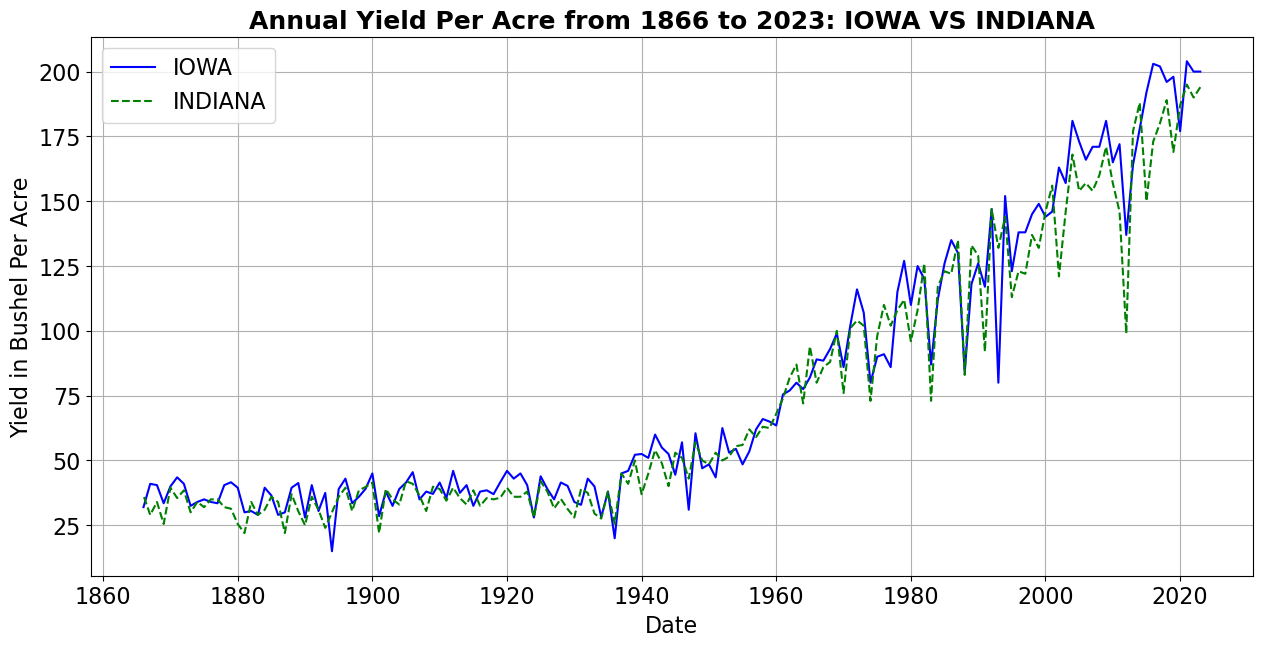

In [5]:
# Going to start looking at efficiency by charting a time series of yield per acre in the big 3 Illinois, Indiana, and Iowa
# note: initially Illinois was also plotted to represent the big 3 for project consistency but the plot looked too crowded and the additional 
# state did not add any value to the main message

# dropping unneccsary columns
yield_peracre = yield_peracre.drop(columns = ["Data Item","County ANSI","Program","Week Ending","Geo Level","State ANSI","Ag District", "Ag District Code","County","Zip Code","Region","watershed_code","Watershed","Commodity","Domain","Domain Category","CV (%)"])

# slicing to only select observed values (ommiting forecasts)
yield_peracre = yield_peracre.loc[yield_peracre["Period"] == "YEAR"]


# creating seperate data frames for each of the three states

illinois = yield_peracre.loc[yield_peracre["State"] == "ILLINOIS"]
indiana = yield_peracre.loc[yield_peracre["State"] == "INDIANA"]
iowa = yield_peracre.loc[yield_peracre["State"] == "IOWA"]

# printing to view sliced dataframes and ensure we have consitent dates and formatting for plotting 
print(illinois)
print(iowa)

# creating the plot, we're using only one 'Year' column for the x-axis, as the years for both Illinois and Iowa are identical.

fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(iowa["Year"],iowa["Value"],label = "IOWA",color = "blue")
ax.plot(iowa["Year"],indiana["Value"],linestyle='dashed',label = "INDIANA",color = "green")
plt.title("Annual Yield Per Acre from 1866 to 2023: IOWA VS INDIANA",fontsize = 18, fontweight = "bold")
plt.xlabel("Date",fontsize = 16)
plt.ylabel("Yield in Bushel Per Acre",fontsize = 16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.legend(loc="upper left",fontsize = 16)
ax.grid(True)
plt.savefig("Yield Per Acre: Indiana vs Iowa")
plt.show()


Alas, our first visualization, and an interesting one at that. The line plot clearly portrays the improved efficiency in the production of corn over the last 157 years. This is a nice direct measurement of efficiency as the acre does not change. A few things to note beyond the obvious upward trend of the graph:

1) Between 1940 and 1960 the rate of acceleration in the yield in BU/Acre begins to take off and appears to maintain an impressive growth rate till the present. Especially when we compare this to the initial approx 80-100 years of the graph. We did attempt to research if there were significant changes that took place in the agricultural industry during this window but were not able to pinpoint anything that may be responsible for such a catalyst in growth. 

    We can only hypothesize that continued advancements in corn farming research, technology, and processes led to this increased level of efficiency. A more       comprehensive analysis of farming history may provide an answer to this question but is not necessarily relevant to the scope of this project. 
 
2) The yield in BU/Acre can be quite volatile. Notice that regardless of the time frame the spikes and dips in production can fluctuate widely from one year to the next. While we cannot assert what is causing these fluctuations from this image we can infer that corn must be sensitive to other variables that influence its yield, things like weather, global demand and supply, etc.

3) The increase in efficiency is enjoyed by both Indiana and Iowa which speaks to the fact that these improvements are industry-wide and are not a result of any kind of specialization or competitive advantage particular to these states. While there are certain factors that differentiate these states and others found in the corn belt who are world leaders in the production of corn, we have looked at data for other counties and states and the yield in BU/Acre gains are comparable.

From this analysis, the next logical question we sought out to answer was - what is driving this increase in efficiency? After doing some research and looking at what data was available to use on the NASS quick stats database we discovered that the plant_peracre dataset discussed earlier would be very useful for us. We realized that if we took the yield/acre divided by the plant per acre over the same time frame in the two datasets we would be able to derive the yield per plant in a particular state. From there we can create a side-by-side visualization that will be very useful for understanding what is going on in the acre with regards to the plants themselves.

The first steps of the wrangling are as described when we introduced the yield_per plant data set but some additional steps must be taken to obtain the yield per plant. Note that the value column in this data set is a string (shown below) so we must convert this to a float or int for our analysis. Moreover, while our yield in Bu/Acre dataset dates back to 1866 (including Iowa) our dataset for plants per acre dates back to 1963. So we will have to slice the Iowa yield in BU/Acre data frame to 1963 - 2023. With this completed we can insert a new variable into our plant per acre data frame that contains the yield per plant and finally multiply that figure by 56 to get the yield per plant in lbs as opposed to BU. This way the audience has a slightly enhanced ability to conceptualize the measurement. Please see the code below for the work.

In [6]:
print(type(plant_peracre.loc[0,"Value"]))
print((plant_peracre.loc[0,"Value"]))

<class 'str'>
32,250


    Year Period State  Value
0   2023   YEAR  IOWA  32250
1   2022   YEAR  IOWA  31600
2   2021   YEAR  IOWA  31800
3   2020   YEAR  IOWA  31050
4   2019   YEAR  IOWA  30750
..   ...    ...   ...    ...
56  1967   YEAR  IOWA  16000
57  1966   YEAR  IOWA  15800
58  1965   YEAR  IOWA  15000
59  1964   YEAR  IOWA  14300
60  1963   YEAR  IOWA  13600

[61 rows x 4 columns]
    Year Period State  Value
0   2023   YEAR  IOWA  200.0
1   2022   YEAR  IOWA  200.0
2   2021   YEAR  IOWA  204.0
3   2020   YEAR  IOWA  177.0
4   2019   YEAR  IOWA  198.0
..   ...    ...   ...    ...
56  1967   YEAR  IOWA   88.5
57  1966   YEAR  IOWA   89.0
58  1965   YEAR  IOWA   82.0
59  1964   YEAR  IOWA   77.5
60  1963   YEAR  IOWA   80.0

[61 rows x 4 columns]
    Year Period State  Value  yield_perplant
0   2023   YEAR  IOWA  32250        0.347287
1   2022   YEAR  IOWA  31600        0.354430
2   2021   YEAR  IOWA  31800        0.359245
3   2020   YEAR  IOWA  31050        0.319227
4   2019   YEAR  IOWA  30750     

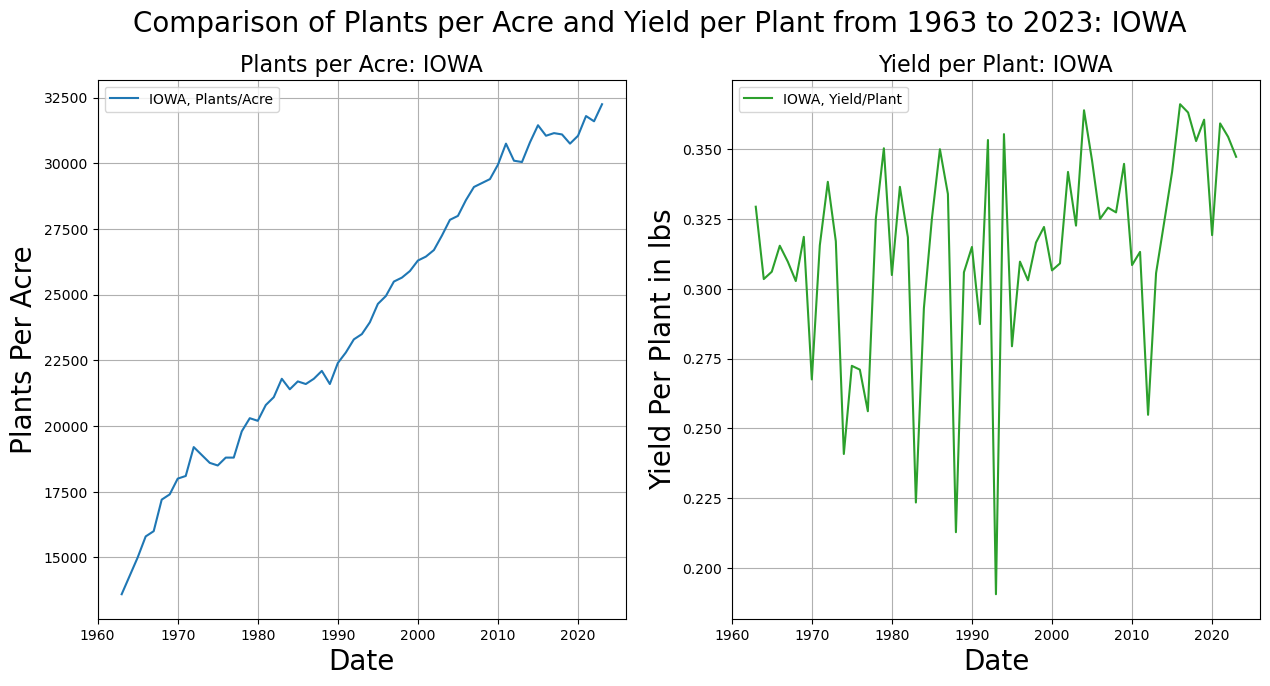

In [7]:
# dropping irrelevant columns 
plant_peracre = plant_peracre.drop(columns = ["Data Item","County ANSI","Program","Week Ending","Geo Level","State ANSI","Ag District", "Ag District Code","County","Zip Code","Region","watershed_code","Watershed","Commodity","Domain","Domain Category","CV (%)"])

# Selecting year to filter out any forecasts
plant_peracre = plant_peracre.loc[plant_peracre["Period"] == "YEAR"]

# converting "Value" column from a string to a float 
plant_peracre["Value"] = pd.to_numeric(plant_peracre["Value"].str.replace(',',''))

# resetting the index
plant_peracre.reset_index(inplace = True)

# filtering Iowa dataframe to include years 1963 - 2023 aligning with the plant_peracre data frame
iowa = iowa.loc[iowa["Year"] >= 1963]

 # resetting indices 
iowa.reset_index(inplace = True)
iowa.drop(columns = ["index"],inplace = True)
plant_peracre.drop(columns = ["index"],inplace = True)
#plant_peracre.drop(columns = ["level_0"],inplace = True)

# making sure plant per acre value column has succesfully been converted to numeric 
print(plant_peracre)

# making sure iowa yield per acre has been succesfully filtered
print(iowa)

# completing the division of columns to derive yield per plant in lbs for iowa and assigning the variable to the plant_peracre data frame
plant_peracre["yield_perplant"] = iowa["Value"].astype(float) / plant_peracre["Value"].astype(float)
plant_peracre["yield_perplant"] = plant_peracre["yield_perplant"] * 56
print(plant_peracre)


# Creating a side by side plot for comparison

a = plant_peracre["Year"]
b = plant_peracre["Value"]
c = plant_peracre["yield_perplant"]

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

# Left Plot (Plants per Acre)
axs[0].plot(a, b, label='IOWA, Plants/Acre', color='tab:blue')
axs[0].set_title('Plants per Acre: IOWA',fontsize = 16)
axs[0].set_xlabel('Date',fontsize = 20)
axs[0].set_ylabel('Plants Per Acre',fontsize = 20)
axs[0].legend(loc="upper left")
axs[0].grid(True)

# Right Plot (Yield per Plant)
axs[1].plot(a, c, label='IOWA, Yield/Plant', color='tab:green')
axs[1].set_title('Yield per Plant: IOWA', fontsize = 16)
axs[1].set_xlabel('Date',fontsize = 20)
axs[1].set_ylabel('Yield Per Plant in lbs',fontsize = 20)
axs[1].legend(loc="upper left")
axs[1].grid(True)

plt.suptitle('Comparison of Plants per Acre and Yield per Plant from 1963 to 2023: IOWA',fontsize = 20)
plt.savefig("Plants per acre vs yield per plant")
plt.show()

Now we have successfully produced another illuminating visual for our investigation. Let's discuss some of the key takeaways from each plot. 

1) Plants Per Acre - Here we get a very straightforward and clear answer to one of the key drivers in the increase in efficiency spotted from our previous graph. We see a very steady linear trend in the number of plants planted in an acre over the 1963 to 2023 time frame. No doubt this would account for a large portion of the efficiency gains. An interesting follow-up question might be what has allowed for such a significant increase in the number of plants in an acre? If you look closely between the decades plotted you will notice that right as the plants per acre hit 30,000 in 2010 you can visually see the growth rate declining when compared to the majority of the prior decades, and this is no coincidence. According to Mark Licht from Iowa State University maximum corn plant population tends to be near 35,000 plants/acre. He also describes how farmers want to choose a seeding rate that produces economical optimal yield as opposed to maximum yield. For these reasons, we will likely begin to see the yield per plant taper off at this 30,000 - 35,000 threshold. Of course, it's possible advancements in farming technologies could push the bounds of this threshold. 

2) Yield Per Plant - we thought that this metric would give us great insights into looking at the impacts of genetically modified organisms and selective breeding as these are two things that directly affect the plants themselves. One of the questions/opinions we had and that many people not familiar with corn farming might have is something like - "Could it be GMOs responsible for such an increase in efficiency over time? Are the size of the ears so much larger that you get significantly more kernels/yield from the plant?". Well, this graph can address that question. Over the past 63 years, we can see that there does appear to be a slight improvement in the yield of the plant but it is nowhere near large enough to explain the huge increase we see in yield per acre even when viewing it from the same time frame (1963 - 2023). 

3) Comparing the effects of both - We do not want to undermine the importance of this improvement in yield per plant - consider the following hypothetical example. Let's suppose from 1963 and 2023 that today on average you get approx .025 more lbs per plant (.350 - .325). More let's presume that in 2023 you had 30,000 plants in an acre and 1963 15,000 plants in an acre. Lastly, let's assume in 2023 you yielded 200 BU/Acre and in 1963 you yielded 75 BU/Acre. We have derived these figures as rough approximations by looking at the graphs. To be clear we are simply trying to illustrate a point not provide accurate detailed estimates. Using these rough estimates we can break down the effects of increased plant density and increased yield per plant as follows:
   
   change in yield per acre = 200 - 75 = 125 BU/Acre
   
   change in yield per plant = .350 - .325 = .025 lbs
   
   change in plant denisty = 30,000 - 15,000 = 15,000 plants
   
   additional yield per acre due to plant density = 15,000 (add plants) * .325 lbs (1963 yield/plant) = 4,875 lbs of yield/ 56 = 87 BU/Acre, 87 / 125 = 69.6%
   
   additonal yield per acre due to yield increase per plant = 15,000 (1963 # of plants) * .025 (add yield/plant) = 10.4 Bu/Acre = 10.4 / 125 = 8.32%
   
   additional yield per acre = 200 /125 - 1 = 60% 
   
   from this example, we can see that of the 60% increase in yield in BU/Acre approx 70% can be attributed to the increase due to plant density and approx 8.32% can be attributed to the increase in yield per plant. Leaving, 21.68% of the increase of yield in Bu/acre unexplained.
   
   The purpose of this exercise is not to provide hard figures attributing the effects described in the sentence above. But it is reasonable enough given the data to illustrate the potential magnitudes of these two factors on yield in Bu/Acre. As well as highlight that other sources of efficiency gains could be investigated.
   

Responding to Feedback

One of the questions/feedback we received for this research question was as follows - "One area I wanted to point out is the variability in yield per plant changing over time (particularly before the 2000s), and if this was a result of GMO seed being resistant to severe weather, etc. May be an area worth exploring outside the project scope."

This person made a fantastic observation and truthfully we did not even notice the reduction in variance spotted around the 2000 mark probably due to the very low yield per plant in 2012 caused by the severe drought confirmed by our weather data. However, if you look at the yield/plant graph you will notice that at about 1995 the yield/plant appears to become much less volatile than when comparing it to pre-1995. We looked into the question and found something very interesting. 

In 1996 the first GM-engineered crops were introduced to corn farming (Niederhuber, 2015). The first commercial product was something known as a Bt (Bacillus thuringiensis) based biopesticide (Niederhuber, 2015). This Bt gene is a bacteria that is poisonous to caterpillars (Bessin, 2019). Caterpillars can be problematic for corn plants as these larvae will bore into the plant causing damage (Bessin, 2019). The Bt endotoxin is considered safe for humans and generally does not harm other insects such as beetles, flies, bees, and wasps (Bessin, 2019). Today 85% of corn crops in the United States contain the bt gene (Niederhuber, 2015). This modification to corn essentially eliminated the use of pesticides (Niederhuber, 2015).

In 1998 the first glyphosate-resistant corn product commonly called "round-up ready" became available ("Herbicide tolerance," n.d.). These are also known as Herbicide-resistant crops (HT crops). Glyphosate is a herbicide that farmers apply to their crops to kill weeds (Wilkerson, 2015). But the problem was that these herbicides would also kill the corn plant (Wilkerson, 2015). A gene from Agrobacteria was engineered into the plant making it resistant to this herbicide (Wilkerson, 2015).According to the USDA, today about 85% of corn crops also contain this GM and most crops are stacking Ht and Bt together. While the Bt gene dramatically reduced pesticide use, Ht crops have increased the use of herbicides and created the issue of "super weeds" which are glyphosate-resistant weeds(Wilkerson, 2015).

We were able to find the data on pesticide and herbicide application in Illinois, Indiana, and Iowa. The data is consistent with what we found in the research. 
Please the charts below.

In [8]:
# chart of pesticide and herbicide application

To address this person's question we will modify our data frame to be split into a pre GM corn and post GM corn time frame. Then we will compute the means and standard deviations of each period and plot them on a histogram with a shared axis so we can compare their distributions. Please see the work below.

    Year  yield_perplant
28  1995        0.279432
29  1994        0.355407
30  1993        0.190638
31  1992        0.353305
32  1991        0.287368
    Year  yield_perplant
23  2000        0.306616
24  1999        0.322162
25  1998        0.316569
26  1997        0.303059
27  1996        0.309739


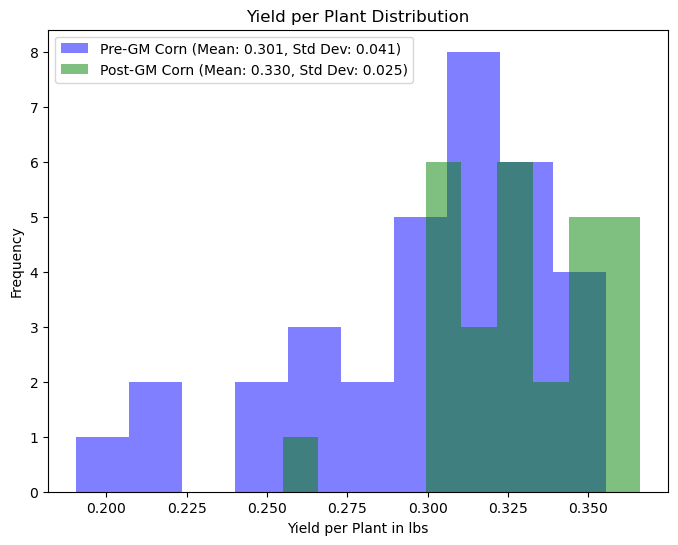

In [12]:
# subsetting yield_perplant to only contain year and yield per plant
yield_perplant = plant_peracre[["Year","yield_perplant"]]
yield_perplant

# creating time frames for pre GM corn and post GM corn
pre_gm = yield_perplant.loc[yield_perplant["Year"] <= 1995]
print(pre_gm.head())
post_gm = yield_perplant.loc[yield_perplant["Year"] > 1995]
print(post_gm.tail())


# Calculate the means and standard deviations of pre_gm and post_gm
pre_bt_mean = pre_gm['yield_perplant'].mean()
post_bt_mean = post_gm['yield_perplant'].mean()
pre_bt_std = pre_gm['yield_perplant'].std()
post_bt_std = post_gm['yield_perplant'].std()

#plot the histograms 
fig, ax = plt.subplots(figsize=(8, 6))


ax.hist(pre_gm['yield_perplant'], bins=10, alpha=0.5, label=f'Pre-GM Corn (Mean: {pre_bt_mean:.3f}, Std Dev: {pre_bt_std:.3f})', color='blue')
ax.hist(post_gm['yield_perplant'], bins=10, alpha=0.5, label=f'Post-GM Corn (Mean: {post_bt_mean:.3f}, Std Dev: {post_bt_std:.3f})', color='green')

ax.set_xlabel('Yield per Plant in lbs')
ax.set_ylabel('Frequency')
ax.set_title('Yield per Plant Distribution')
ax.legend()

plt.savefig("yield per plant histrogram")
plt.show()

Here we can see the distribution of yield per plant in lbs for time frames before GM corn and after GM corn. You can see in the histogram that after the introduction of GM corn, the average yield/plant and the observed values of yield/plant have shifted to the right. In other words, it appears yield/per plant has increased as a result of this change in the industry. We can also see the variance in yields has decreased indicated by the decrease in standard deviation from each period's respective means and by looking at the distribution there are much fewer occurrences of these very low yields/per plant as we see in the case of pre GM corn. Now this is a very simple way to conduct this analysis, some limitations are that first off we have much fewer observations for GM corn as opposed to pre-GM corn. Secondly, we have not factored in the adoption rate of these technologies. If you are interested in these adoption rates and more about GM corn please see this link: https://www.ers.usda.gov/data-products/adoption-of-genetically-engineered-crops-in-the-u-s/recent-trends-in-ge-adoption/

With this in mind, it is still reasonable to conclude that it is very likely given our analysis that GM corn has reduced the variability in yield/per plant to the downside making it more resilient to the adverse effects of insects and weeds. Thereby providing a justified answer to our colleague's question. Note we have not found any research that would indicate that there has been GM to corn that would make it more resistant to weather.


References:

USDA ERS - Recent trends in GE adoption. (n.d.). https://www.ers.usda.gov/data-products/adoption-of-genetically-engineered-crops-in-the-u-s/recent-trends-in-ge-adoption/

Borunda, A. (2022, January 24). U.S. corn production is booming—but not for the reasons scientists hoped. Environment. https://www.nationalgeographic.com/environment/article/us-corn-production-booming-but-its-future-isnt-clear?loggedin=true&rnd=1697610317523

Bessin, R. (2019, November). BT-Corn: What it is and how it works | Entomology. http://entomology.ca.uky.edu/ef130

Herbicide tolerant crops. (n.d.). Beyond Pesticides. https://www.beyondpesticides.org/resources/genetic-engineering/herbicide-tolerance

Wilkerson, J. (2017, October 1). Why Roundup Ready Crops Have Lost their Allure - Science in the News. https://sitn.hms.harvard.edu/flash/2015/roundup-ready-crops/

Niederhuber, M. (2015, August 11). Insecticidal Plants: The tech and safety of GM BT crops - Science in the News. Science in the News. https://sitn.hms.harvard.edu/flash/2015/insecticidal-plants/

Licht, M. (2021, April 9). Considerations for corn seeding rates | Integrated Crop Management. https://crops.extension.iastate.edu/blog/mark-licht-zachary-clemens/considerations-corn-seeding-rates